In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

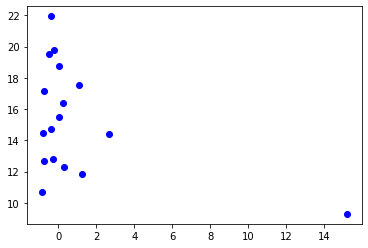

In [3]:
plt.plot(population_inc,population_old,'bo')
plt.show()

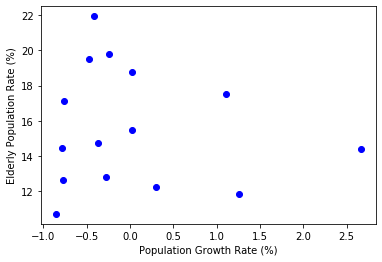

In [6]:
population_inc = population_inc[:5] + population_inc[6:]
population_old = population_old[:5] + population_old[6:]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

-0.3683664848310068 15.617296572201484


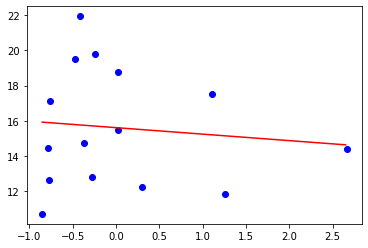

In [7]:
x=population_inc
y=population_old

x_bar=sum(x)/len(x)
y_bar=sum(y)/len(y)

a = sum([(y_-y_bar)*(x_-x_bar) for y_,x_ in list(zip(y,x))])
a /= sum([(x_-x_bar)**2 for x_ in x])
b=y_bar-a*x_bar
print(a,b)

line_x=np.arange(min(x),max(x),0.01)
line_y=a*line_x + b

plt.plot(x,y,'bo')
plt.plot(line_x,line_y,'r-')
plt.show()

In [8]:
import random

a=tf.Variable(random.random())
b=tf.Variable(random.random())

def compute_loss():
    y_pred=a*x+b
    loss=tf.reduce_mean((y-y_pred)**2)
    return loss

optimizer=tf.optimizers.Adam(lr=0.07)
for i in range(1000):
    optimizer.minimize(compute_loss,var_list=[a,b])
    if i%100==0:
        print(compute_loss())

tf.Tensor(235.08649, shape=(), dtype=float32)
tf.Tensor(84.92476, shape=(), dtype=float32)
tf.Tensor(28.207712, shape=(), dtype=float32)
tf.Tensor(13.299302, shape=(), dtype=float32)
tf.Tensor(10.704518, shape=(), dtype=float32)
tf.Tensor(10.4113035, shape=(), dtype=float32)
tf.Tensor(10.389826, shape=(), dtype=float32)
tf.Tensor(10.388809, shape=(), dtype=float32)
tf.Tensor(10.388779, shape=(), dtype=float32)
tf.Tensor(10.388779, shape=(), dtype=float32)


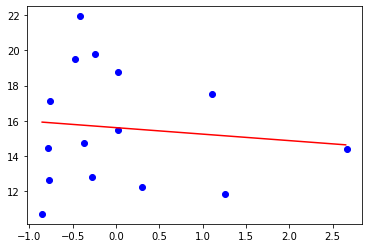

In [9]:
line_x=np.arange(min(x),max(x),0.01)
line_y=a*line_x + b

plt.plot(x,y,'bo')
plt.plot(line_x,line_y,'r-')
plt.show()

In [10]:
x=np.array(x)
y=np.array(y)

tf.Tensor(230.1499, shape=(), dtype=float32)
tf.Tensor(70.085365, shape=(), dtype=float32)
tf.Tensor(33.655148, shape=(), dtype=float32)
tf.Tensor(18.110504, shape=(), dtype=float32)
tf.Tensor(12.270081, shape=(), dtype=float32)
tf.Tensor(10.560041, shape=(), dtype=float32)
tf.Tensor(10.166635, shape=(), dtype=float32)
tf.Tensor(10.09524, shape=(), dtype=float32)
tf.Tensor(10.085016, shape=(), dtype=float32)
tf.Tensor(10.083866, shape=(), dtype=float32)


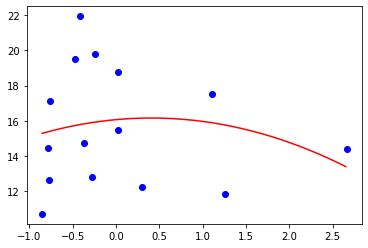

In [11]:
a=tf.Variable(random.random())
b=tf.Variable(random.random())
c=tf.Variable(random.random())

def compute_loss():
    y_pred= a*(x**2) + b*x + c
    loss=tf.reduce_mean((y-y_pred)**2)
    return loss

optimizer=tf.optimizers.Adam(lr=0.07)
for i in range(1000):
    optimizer.minimize(compute_loss,var_list=[a,b,c])
    if i%100==0:
        print(compute_loss())
        
line_x=np.arange(min(x),max(x),0.01)
line_y=a*line_x**2 + b*line_x+c

plt.plot(x,y,'bo')
plt.plot(line_x,line_y,'r-')
plt.show()

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6,activation='tanh',input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(x,y,epochs=10)

Train on 15 samples
Epoch 1/10
15/15 [==============================] - 0s 21ms/sample - loss: 255.0730
Epoch 2/10
15/15 [==============================] - 0s 64us/sample - loss: 124.6259
Epoch 3/10
15/15 [==============================] - 0s 66us/sample - loss: 10.2554
Epoch 4/10
15/15 [==============================] - 0s 65us/sample - loss: 10.2329
Epoch 5/10
15/15 [==============================] - 0s 66us/sample - loss: 10.2225
Epoch 6/10
15/15 [==============================] - 0s 133us/sample - loss: 10.2130
Epoch 7/10
15/15 [==============================] - 0s 133us/sample - loss: 10.2030
Epoch 8/10
15/15 [==============================] - 0s 68us/sample - loss: 10.1922
Epoch 9/10
15/15 [==============================] - 0s 133us/sample - loss: 10.1803
Epoch 10/10
15/15 [==============================] - 0s 133us/sample - loss: 10.1673


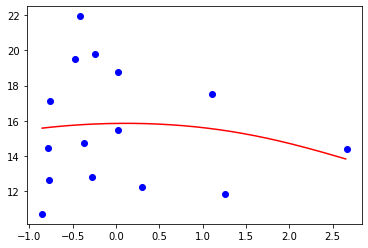

In [14]:
line_x=np.arange(min(x),max(x),0.01)
line_y=model.predict(line_x)

plt.plot(x,y,'bo')
plt.plot(line_x,line_y,'r-')
plt.show()

In [15]:
from tensorflow.keras.datasets import boston_housing

(train_X,train_y),(test_X,test_y)=boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [16]:
x_mean=train_X.mean(axis=0)
x_std=train_X.std(axis=0)
train_trans_X=(train_X-x_mean)/x_std
#train_trans_X

y_mean=train_y.mean(axis=0)
y_std=train_y.std(axis=0)
train_trans_y=(train_y-y_mean)/y_std
#train_trans_y

test_trans_X=(test_X-x_mean)/x_std
test_trans_y=(test_y-y_mean)/y_std

In [17]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=52,activation='relu',input_shape=(13,)),
    tf.keras.layers.Dense(units=39,activation='relu'),
    tf.keras.layers.Dense(units=26,activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 52)                728       
_________________________________________________________________
dense_3 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_4 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [19]:
history=model.fit(train_trans_X,train_trans_y,epochs=32,batch_size=32,validation_split=0.25)

Train on 303 samples, validate on 101 samples
Epoch 1/32
303/303 [==============================] - 0s 1ms/sample - loss: 2.9665 - val_loss: 0.7847
Epoch 2/32
303/303 [==============================] - 0s 63us/sample - loss: 0.4950 - val_loss: 0.8576
Epoch 3/32
303/303 [==============================] - 0s 69us/sample - loss: 0.4105 - val_loss: 0.6024
Epoch 4/32
303/303 [==============================] - 0s 66us/sample - loss: 0.3234 - val_loss: 0.4298
Epoch 5/32
303/303 [==============================] - 0s 69us/sample - loss: 0.3045 - val_loss: 0.2908
Epoch 6/32
303/303 [==============================] - 0s 63us/sample - loss: 0.1850 - val_loss: 0.1846
Epoch 7/32
303/303 [==============================] - 0s 59us/sample - loss: 0.1383 - val_loss: 0.2137
Epoch 8/32
303/303 [==============================] - 0s 59us/sample - loss: 0.1241 - val_loss: 0.2072
Epoch 9/32
303/303 [==============================] - 0s 59us/sample - loss: 0.1108 - val_loss: 0.2534
Epoch 10/32
303/303 [=======

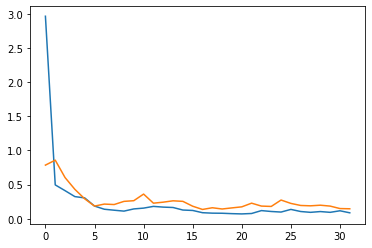

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

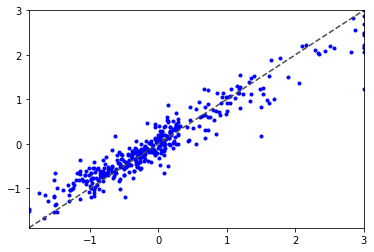

In [21]:
pred_y=model.predict(train_trans_X)
plt.plot(train_trans_y,pred_y,'b.')
plt.axis([min(train_trans_y),max(train_trans_y),min(train_trans_y),max(train_trans_y)])

plt.plot([min(train_trans_y),max(train_trans_y)],[min(train_trans_y),max(train_trans_y)],ls='--',c='0.3')

plt.show()

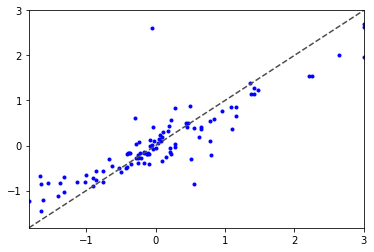

In [22]:
pred_y=model.predict(test_trans_X)
plt.plot(test_trans_y,pred_y,'b.')
plt.axis([min(test_trans_y),max(test_trans_y),min(test_trans_y),max(test_trans_y)])

plt.plot([min(test_trans_y),max(test_trans_y)],[min(test_trans_y),max(test_trans_y)],ls='--',c='0.3')

plt.show()

In [23]:
history=model.fit(train_trans_X,train_trans_y,epochs=32,batch_size=32,validation_split=0.25,
callbacks=[tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_loss')])

Train on 303 samples, validate on 101 samples
Epoch 1/32
303/303 [==============================] - 0s 77us/sample - loss: 0.0950 - val_loss: 0.1254
Epoch 2/32
303/303 [==============================] - 0s 63us/sample - loss: 0.0728 - val_loss: 0.1226
Epoch 3/32
303/303 [==============================] - 0s 64us/sample - loss: 0.0898 - val_loss: 0.1404
Epoch 4/32
303/303 [==============================] - 0s 61us/sample - loss: 0.0746 - val_loss: 0.1517
Epoch 5/32
303/303 [==============================] - 0s 66us/sample - loss: 0.0849 - val_loss: 0.1447


In [24]:
model.evaluate(test_trans_X,test_trans_y)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.17187621663598454